In [1]:
%matplotlib inline

import importlib
import numpy as np
import scipy as sp
from scipy.special import cbrt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from Brownian import *
from types import MethodType

In [2]:
N = 10000
l = 0.1
dt = 0.1
Nt = 100
test = Brownian(N,l,dt)
testInt = TimeIntegrator(test,Nt)
testQoI = QoI(testInt)

In [3]:
testInt.forward(test)

In [4]:
testQoI.compute_J(testInt)
J0 = testQoI.J
D = l*l/4.0/dt
print J0, 2*D*Nt*dt

0.50499693445 0.5


In [5]:
Nt*l

10.0

In [ ]:
testAdjPdf = adj_particle(test)
testInt.backward(testAdjPdf,testQoI)
plt.figure(1)
plt.hist2d(testAdjPdf.x,testAdjPdf.y,weights=testAdjPdf.spwt,bins=50,vmin=-0.6)
plt.colorbar()
plt.figure(2)
plt.plot(testAdjPdf.x,testAdjPdf.y,'.')
plt.show()
print testQoI.dJdA

10.4883467325


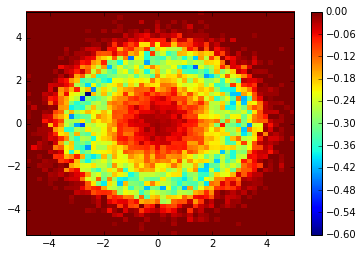

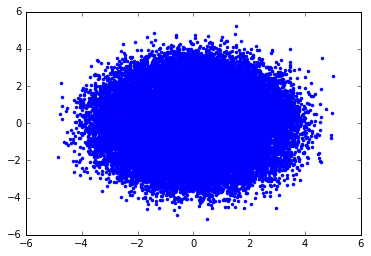

In [7]:
testAdjPdf = adj_particle(test)
testQoI.compute_dJ_pdf = dJ_pdf_vw
testQoI.compute_dJ_pdf = MethodType(dJ_pdf_vw, testQoI, QoI)
testInt.backward(testAdjPdf,testQoI)
plt.figure(3)
plt.hist2d(testAdjPdf.x,testAdjPdf.y,weights=testAdjPdf.spwt,bins=50,vmin=-0.6)
plt.colorbar()
plt.figure(4)
plt.plot(testAdjPdf.x,testAdjPdf.y,'.')
print testQoI.dJdA

In [8]:
plt.show()

In [11]:
#a = np.array([1,2,3,1,2,3])
#a[np.where(a>2)] += 1
#print a
import numpy as np
x = [[1.],[2.],[3.]]
print np.zeros((3,1))
np.append(x,np.zeros((3,1)),axis=1)

[[ 0.]
 [ 0.]
 [ 0.]]


array([[ 1.,  0.],
       [ 2.,  0.],
       [ 3.,  0.]])

In [ ]:
        #weight original pdf
        for i in range(TimeIntegrator.N):
            xp = TimeIntegrator.xData[n,i]
            yp = TimeIntegrator.yData[n,i]
            xgl = np.floor(xp/dx)
            xgr = xgl + 1
            ygl = np.floor(yp/dx)
            ygr = ygl + 1
            pg[xgl+Ng,ygl+Ng] += (1.-xp+xgl*dx)*(1.-yp+ygl*dx)
            pg[xgl+Ng,ygr+Ng] += (1.-xp+xgl*dx)*(yp-ygl*dx)
            pg[xgr+Ng,ygl+Ng] += (xp-xgl*dx)*(1.-yp+ygl*dx)
            pg[xgr+Ng,ygr+Ng] += (xp-xgl*dx)*(yp-ygl*dx)
        pg *= 1./dx/TimeIntegrator.N
        #weight adjoint pdf
        for i in range(AdjBrownian.N):
            xp = AdjBrownian.x[i]
            yp = AdjBrownian.y[i]
            wp = AdjBrownian.spwt[i]
            xgl = np.floor(xp/dx)
            xgr = xgl + 1
            ygl = np.floor(yp/dx)
            ygr = ygl + 1
            pg_hat[xgl+Ng,ygl+Ng] += wp*(1.-xp+xgl*dx)*(1.-yp+ygl*dx)
            pg_hat[xgl+Ng,ygr+Ng] += wp*(1.-xp+xgl*dx)*(yp-ygl*dx)
            pg_hat[xgr+Ng,ygl+Ng] += wp*(xp-xgl*dx)*(1.-yp+ygl*dx)
            pg_hat[xgr+Ng,ygr+Ng] += wp*(xp-xgl*dx)*(yp-ygl*dx)
        pg_hat *= 1./dx